<a href="https://colab.research.google.com/github/Tookss55/DS/blob/main/Unit4/Amir_RegaU4proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install preliz

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import preliz as pz

# UNIT 4 PROJECT

### Context and Data

For my Unit 4 project, I will be analzying the average song duration for 8 different genres, with both hierarchal and non hierarchal distributions. I want to see how these genres compare to one another. The genres and the ways I will refer to them in the code are:

1.   Rap
2.   Pop
3.   Rock
4.   Classical
5.   Jazz
6.   Country
7.   R&b
8.   Alternative

To represent these genres, I will take the three most critically acclaimed albums from one of the top artists of each genre. The artists and albums are:

1.   Drake - Take Care, Nothing Was The Same, IYRTITL
2.   Rihanna - Good Girl Gone Bad, Loud, Anti
3.   GNR - Appetite For Destruction, Use Your Illusions 1,UYI 2
4.   Chopin - Nocturnes, Ballades, Waltzs
5.   Brubeck - Time Out, Jazz at Oberlin, Dave Brubek Quartet at Carnegie Hall
6.   Johnny Cash - At Folsom Prison, At San Quintin, American IV
7.   Aaliyah - AANBAN, One In a Million, Aaliyah
8.   The Strokes - Is This It, Room on Fire, The New Abnormal

From the top three albums of each artist, I documented every song duration, and inputed it into the csv file below. I labeled the song duration with the genre number, and the album/song number.

In [3]:
url_music_data = 'https://raw.githubusercontent.com/Tookss55/DS/refs/heads/main/Unit4/DSU4_PROJ_DATA%20-%20Sheet2.csv'

music_data = pd.read_csv(url_music_data, dtype = {'GENRE':'category'})

music_data

,GENRE,ALBUM/SONG,DURATION
0,1,1/1,272
1,1,1/2,224
2,1,1/3,235
3,1,1/4,208
4,1,1/5,277
...,...,...,...
307,8,3/5,375
308,8,3/6,310
309,8,3/7,275
310,8,3/8,337


(array([ 27., 108., 101.,  37.,  24.,   4.,   7.,   1.,   2.,   1.]),
 array([ 72. , 150.9, 229.8, 308.7, 387.6, 466.5, 545.4, 624.3, 703.2,
        782.1, 861. ]),
 <BarContainer object of 10 artists>)

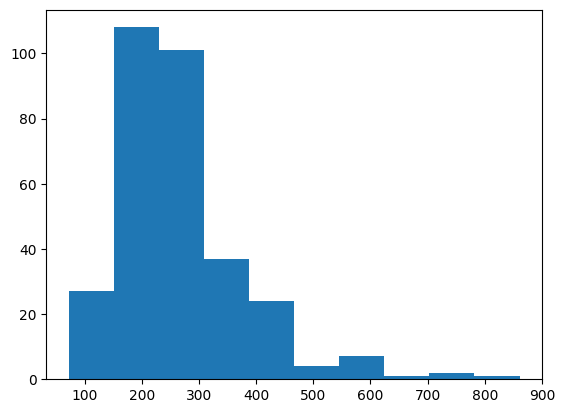

In [4]:
plt.hist(music_data['DURATION'])

In [5]:
print(music_data['DURATION'].mean())
print(music_data['DURATION'].median())

264.7692307692308
244.0


The histogram is a simple representation of my data, showing that majority of my the songs in my data is 200-300 seconds in duration, or about 3 1/2 to 5 minutes long. It also shows that there is a slight positive or right skew.

In [6]:
GENRE_encode = pd.Categorical(music_data['GENRE'])
GENRE_index = GENRE_encode.codes
GENRE_coords = {"GENRE": GENRE_encode.categories}

print(GENRE_encode)
print(GENRE_index)
print(GENRE_coords)

['1', '1', '1', '1', '1', ..., '8', '8', '8', '8', '8']
Length: 312
Categories (8, object): ['1', '2', '3', '4', '5', '6', '7', '8']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
{'GENRE': Index(['1', '2', '3', '4', '5', '6', '7', '8'], dtype='object')}


### NON HIERARCHICAL MODELS

Now that I've inputted my data set, I will make a non hierarchal model, which assume independance.

In [7]:
genre_idx = music_data.GENRE.cat.codes.values

genre_coords = {"GENRE": music_data.GENRE.cat.categories} #this will put the coords in a dict, so pymc can read them

In [ ]:
with pm.Model(coords = GENRE_coords) as music_model:

  # Hyperpriors for the hierarchical model, got help from
  alpha_mu = pm.HalfCauchy('alpha_mu', beta=1)
  beta_mu = pm.HalfCauchy('beta_mu', beta=1)
  alpha_nu = pm.HalfCauchy('alpha_nu', beta=1)
  beta_nu = pm.HalfCauchy('beta_nu', beta=1)

  # Genre-specific parameters for the Gamma distribution
  μ = pm.Gamma('μ', alpha_mu, beta_mu, dims = "GENRE")
  ν = pm.Gamma('ν', alpha_nu, beta_nu, dims = "GENRE")

  # Likelihood (using Gamma distribution for song durations)
  duration_obs = pm.Gamma('duration_obs',
                          mu = μ[genre_idx],
                          sigma = ν[genre_idx],
                          observed = music_data['DURATION'].values)

  idata_music = pm.sample(target_accept = 0.95)

In [ ]:
pm.sample_posterior_predictive(idata_music, model = music_model, extend_inferencedata=True)

(0.0, 1000.0)

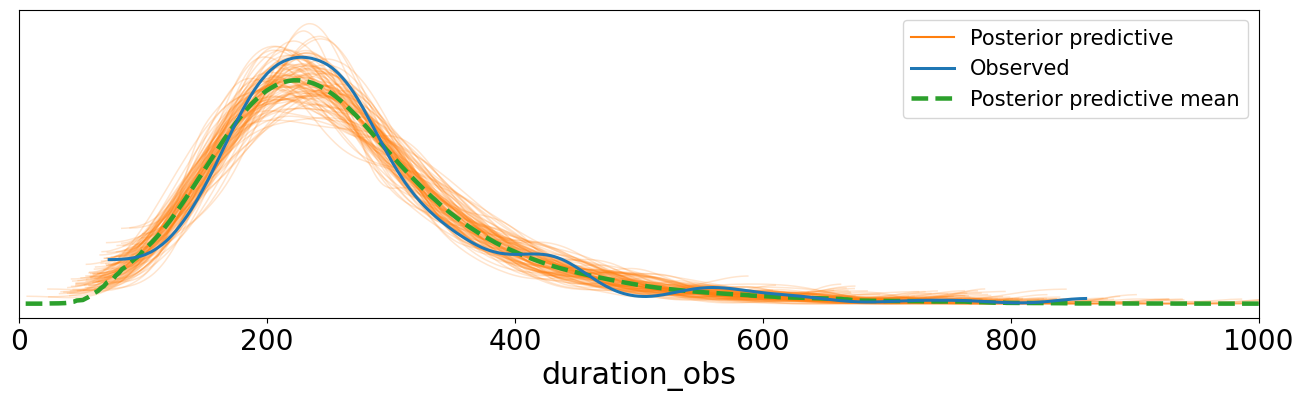

In [31]:
ax = az.plot_ppc(idata_music, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

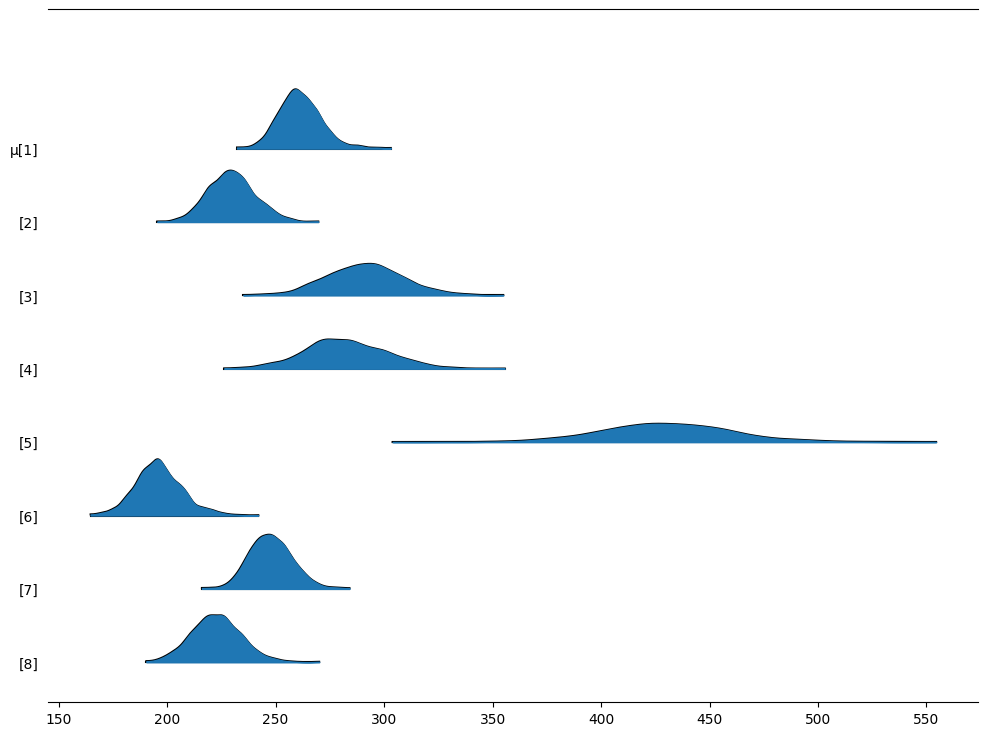

In [33]:
axes = az.plot_forest(idata_music, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=1)

We see that Jazz music, group 5, has a much larger mean and much more variance than the other genres. This is pretty predictable considering Jazz music is much less structured than other music genres.

In [35]:
with pm.Model(coords = GENRE_coords) as music_model_2:

  # Priors
  μ = pm.Normal('μ', mu = 250, sigma = 100, dims = "GENRE")
  σ = pm.HalfCauchy('σ', beta = 50, dims = "GENRE")
  α = pm.Uniform('α', upper = 1, lower = 0.5, dims = "GENRE")
  β = pm.Uniform('β', upper = 30, lower = 1, dims = "GENRE")

  # Likelihood
  y = pm.SkewStudentT('y', mu = μ[genre_idx], sigma = σ[genre_idx],
                      a = α[genre_idx], b = β[genre_idx],
                      observed = music_data["DURATION"])

  idata_music_2 = pm.sample()

Output()

In [36]:
pm.sample_posterior_predictive(idata_music_2, model = music_model_2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(0.0, 1000.0)

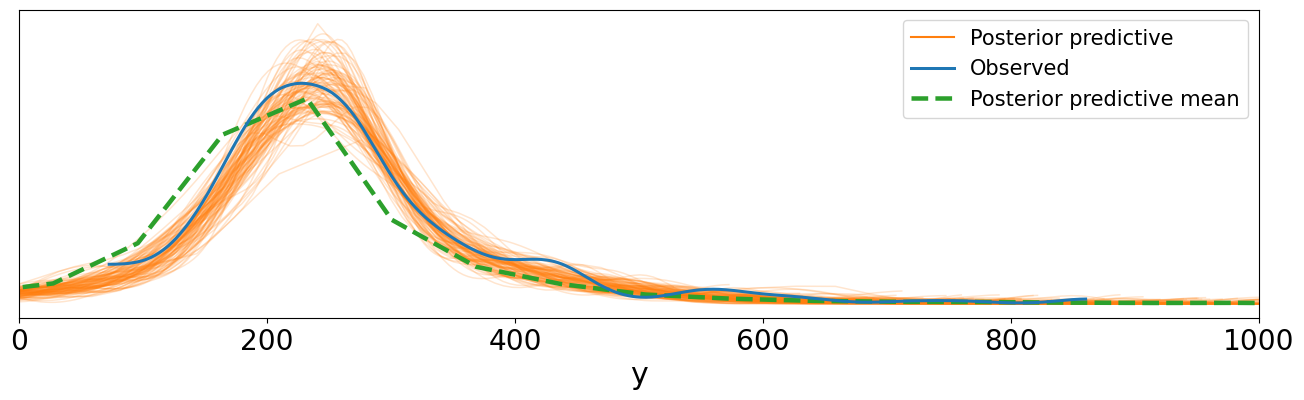

In [37]:
ax = az.plot_ppc(idata_music_2, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

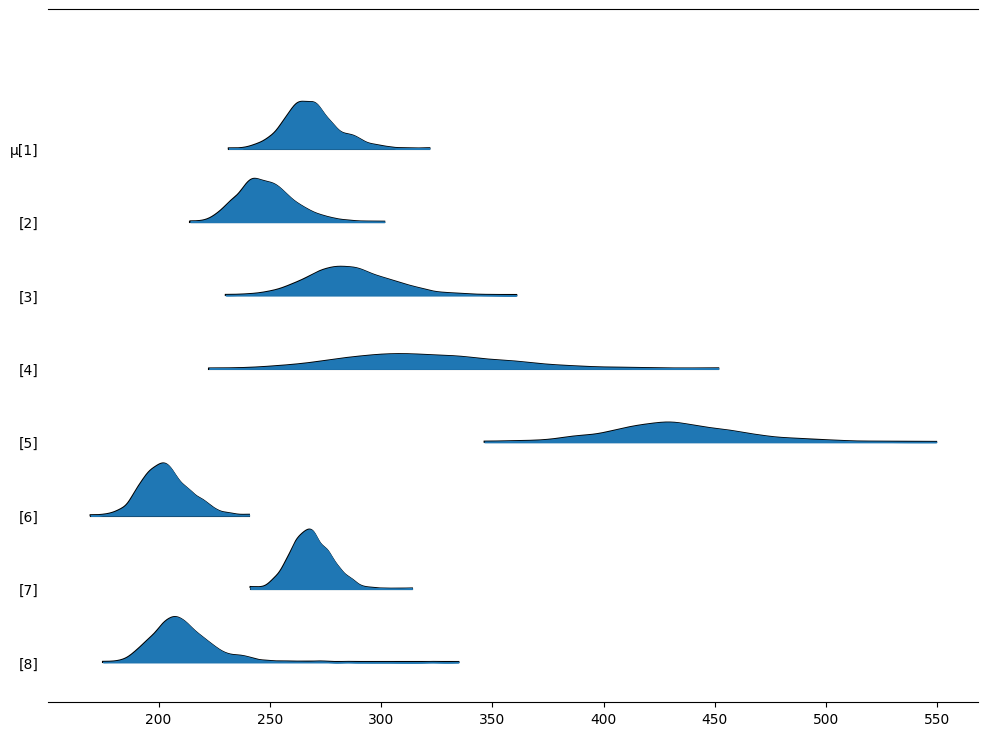

In [38]:
axes = az.plot_forest(idata_music_2, kind="ridgeplot",
                      var_names='μ',
                      combined=True, figsize=(12, 9), hdi_prob=1)

### HIERARCHAL MODELS

In [ ]:
with pm.Model(coords = genre_coords) as music_model_hierch:

  # Hyperpriors
  μ_mu = pm.Normal('μ_mu', mu = 0, sigma = 5)
  σ_mu = pm.HalfNormal('σ_mu', sigma = 3)
  ν_mu = pm.Exponential('ν_mu', lam = 0.5)

  # Priors
  μ = pm.StudentT('μ', mu = μ_mu, sigma = σ_mu, nu = ν_mu, dims = "GENRE")
  σ = pm.HalfNormal('σ', sigma = 10, dims = "GENRE")
  ν = pm.Exponential('ν', lam = 0.5, dims = "GENRE")

  # Likelihood
  y = pm.StudentT('y', mu = μ[genre_idx], sigma = σ[genre_idx], nu = ν[genre_idx],
                  observed = music_data["DURATION"])

  idata_music_hierch = pm.sample()


In [ ]:
pm.sample_posterior_predictive(idata_music_hierch, model = music_model_hierch, extend_inferencedata=True)

(0.0, 1000.0)

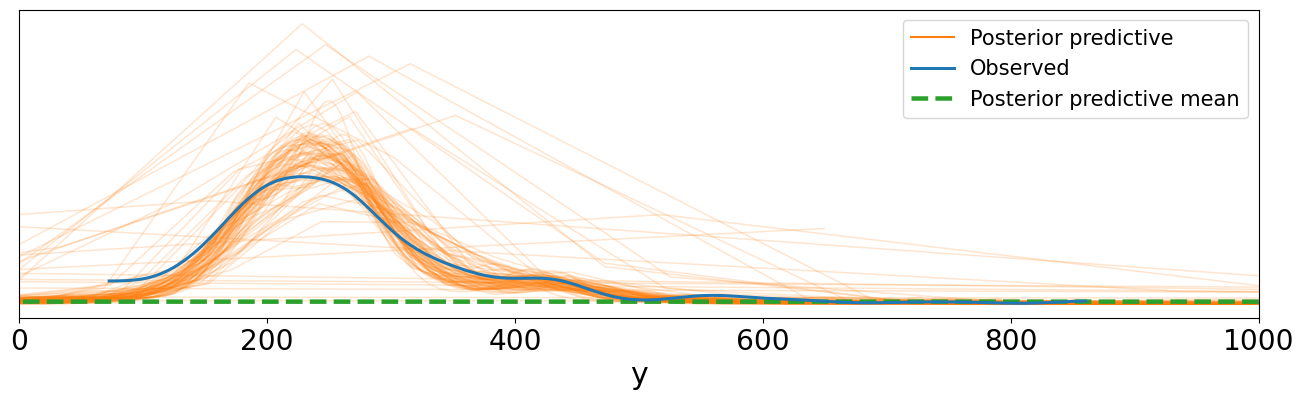

In [44]:
ax = az.plot_ppc(idata_music_hierch, num_pp_samples=100, figsize=(16, 4), colors=["C1", "C0", "C2"])
ax.set_xlim(0, 1000)

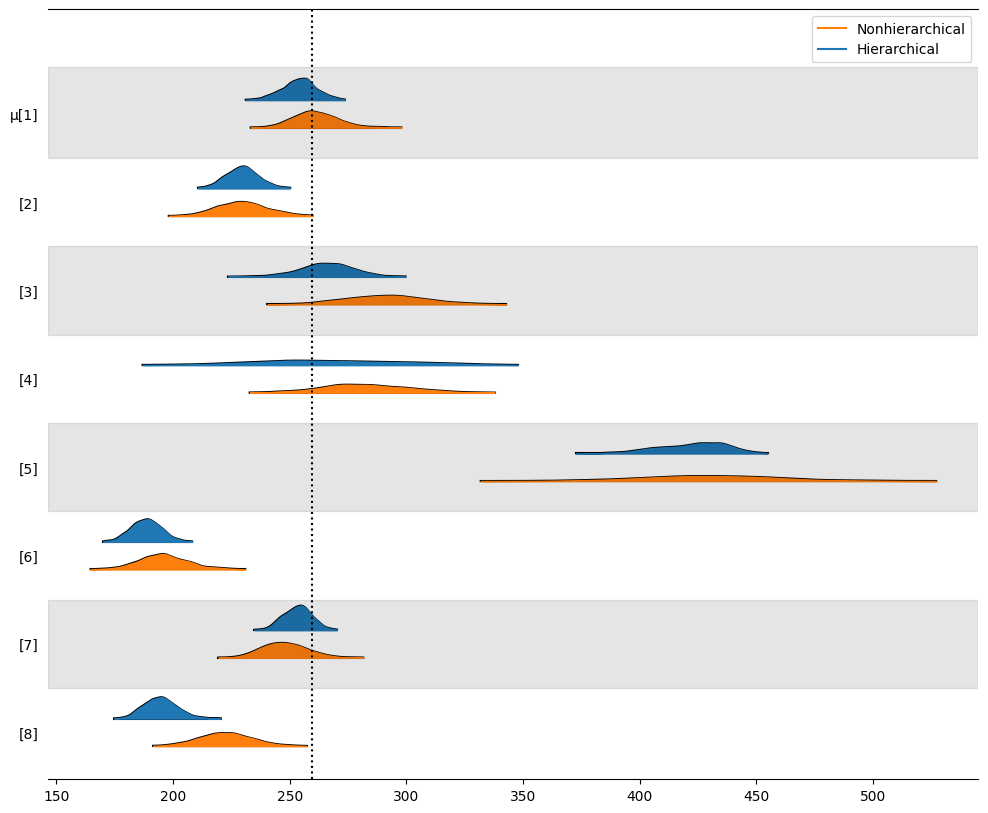

In [45]:
axes = az.plot_forest([idata_music_hierch, idata_music], kind="ridgeplot",
                      model_names=['Hierarchical', 'Nonhierarchical'],
                      var_names='μ', combined=True, figsize=(12, 10),hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_music_hierch.posterior['μ'].mean(), *y_lims, color="k", ls=":");

<xarray.Dataset> Size: 248B
Dimensions:  (GENRE: 8)
Coordinates:
  * GENRE    (GENRE) <U1 32B '1' '2' '3' '4' '5' '6' '7' '8'
Data variables:
    μ        (GENRE) float64 64B 1.005 1.002 1.001 0.9997 ... 1.004 0.9994 1.002
    μ_mu     float64 8B 1.008
    ν        (GENRE) float64 64B 1.0 1.002 1.0 1.001 1.003 1.002 1.002 0.9998
    ν_mu     float64 8B 0.9997
    σ        (GENRE) float64 64B 1.0 1.001 0.9999 1.001 1.005 1.0 1.002 1.0
    σ_mu     float64 8B 1.0

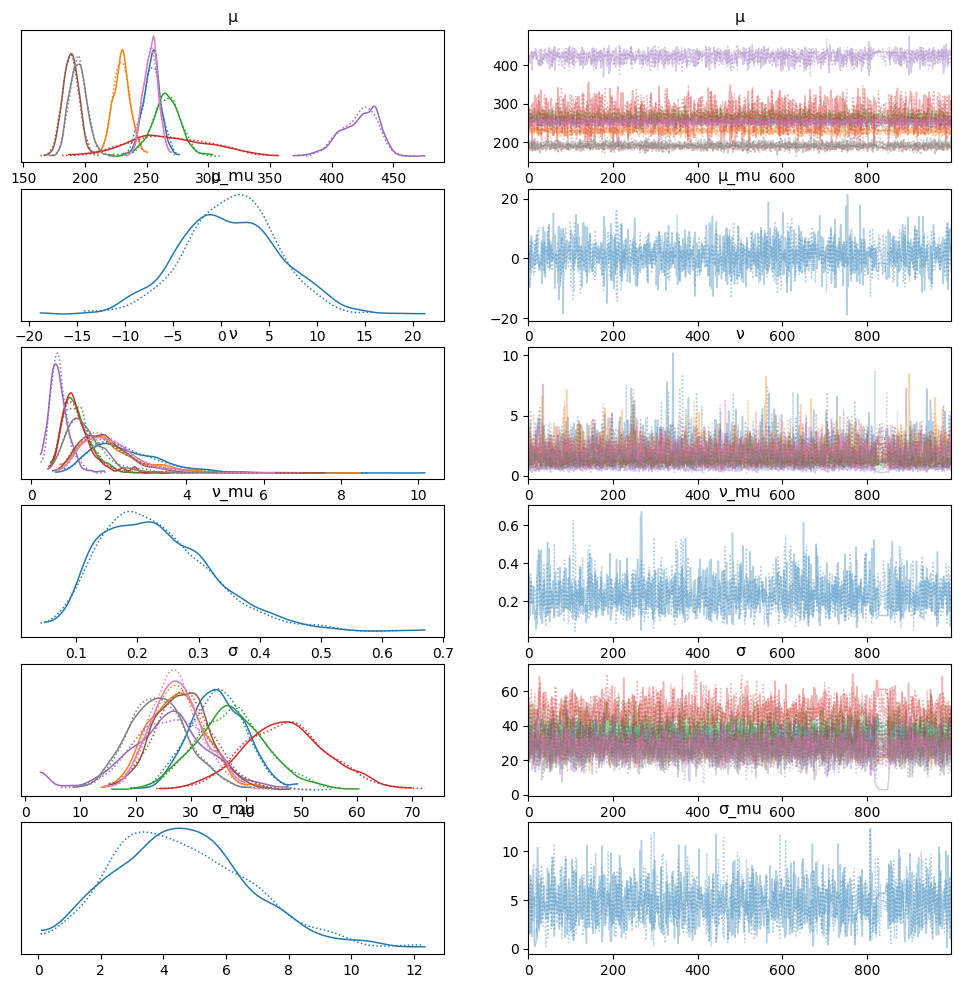

In [46]:
az.plot_trace(idata_music_hierch)
az.rhat(idata_music_hierch)